In [1]:
import numpy as np
%matplotlib inline
import lsst.sims.skybrightness as sb
import matplotlib.pylab as plt
import healpy as hp
import lsst.sims.utils as utils

In [2]:
sm = sb.SkyModel(mags=True)

In [3]:
ra = 55.64056042688472
dec = -30.23274831365254
mjd = 59991.02612061111
#sm.setRaDecMjd(ra, dec, mjd, degrees=True)

In [4]:
#np.degrees(sm.moonAlt), np.degrees(sm.sunAlt)

In [5]:
#np.degrees(sm.alts), np.degrees(sm.azs)

In [6]:
# Offset things slightly just to see.
#sm.setRaDecMjd(ra, dec+2., mjd, degrees=True)
#sm.returnMags()

In [7]:
ras = np.arange(54, 57.5, .25)
sm.setRaDecMjd(ras, ras*0+dec, mjd, degrees=True)

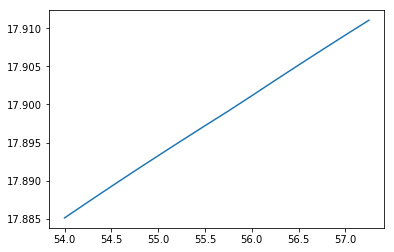

In [8]:
mags = sm.returnMags()
plt.plot(ras, mags['y'])

In [9]:
# Let's check the continuity at 90 degrees
azs = np.arange(85., 95., 0.25)
alts = azs*0 + 65.


In [10]:
sm.setRaDecMjd(azs, alts, mjd, degrees=True, azAlt=True)

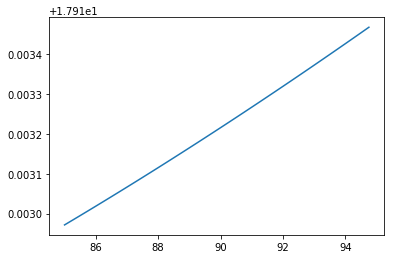

In [11]:
mags = sm.returnMags()
plt.plot(azs, mags['y'])

In [12]:
# Let's track through zenith
alts = np.arange(85, 90, .25)
azs = alts*0+180.

alts = np.append(alts,alts[::-1])
azs = np.append(azs,azs*0)

In [13]:
sm.setRaDecMjd(azs, alts, mjd, degrees=True, azAlt=True)

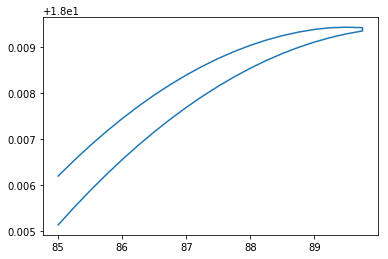

In [14]:
mags = sm.returnMags()
plt.plot(alts, mags['y'])

In [15]:
nside = 32
hpids = np.arange(hp.nside2npix(nside))

In [16]:
az, alt = utils.hpid2RaDec(nside, hpids)

In [17]:
good = np.where(alt > 35.)
az = az[good]
alt=alt[good]
sm.setRaDecMjd(az, alt, mjd, degrees=True, azAlt=True)

In [18]:
mags = sm.returnMags()
result = hpids*0.+hp.UNSEEN
result[good] = mags['y']

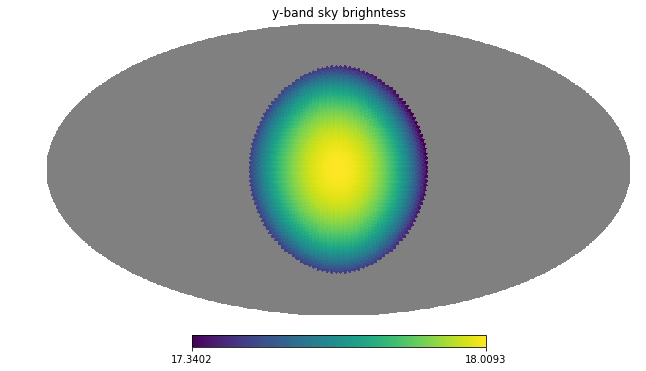

In [19]:
hp.mollview(result, rot=[0,90,0], min=np.min(result[good]), title='y-band sky brighntess')

In [20]:
mags['y'].shape

(2624,)